<a href="https://colab.research.google.com/github/gtmray/Earthquake-Data/blob/master/Earthquake_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from  sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()
pd.set_option('display.max_columns', 5)
plt.style.use('ggplot')

df_x_train = pd.read_csv('https://raw.githubusercontent.com/gtmray/Earthquake-Data/master/train_values.csv')
df_y_train = pd.read_csv('https://raw.githubusercontent.com/gtmray/Earthquake-Data/master/train_labels.csv')
df = pd.merge(df_x_train, df_y_train, on='building_id')

list_convert = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

df[list_convert] = df[list_convert].astype('uint8')
df_y_train['damage_grade'] = df_y_train['damage_grade'].astype('category')

print(df.columns)
X = df.iloc[:, :-1]
y = df['damage_grade']

list_objects = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
df1 = pd.get_dummies(X[list_objects], drop_first=False)
X = pd.concat([X, df1], axis=1)
X.drop(list_objects, axis=1, inplace=True)

y[y<2] = 0
y[y>=2] = 1
X.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1, inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


*****************R E A L   A C C U R A C Y   S C O R E******* 0.9089618387981812
                        
Number of Epochs:  0  Cost:  0.6931471805599452
Number of Epochs:  500  Cost:  0.3299410719223729
Number of Epochs:  1000  Cost:  0.27205412456480643
Number of Epochs:  1500  Cost:  0.25338669643920736
Number of Epochs:  2000  Cost:  0.24530010577964836
Number of Epochs:  2500  Cost:  0.2411613792440982
Number of Epochs:  3000  Cost:  0.2388011973177519
Number of Epochs:  3500  Cost:  0.23734740433672993
Number of Epochs:  4000  Cost:  0.2363978583220311
Number of Epochs:  4500  Cost:  0.23574806754421876


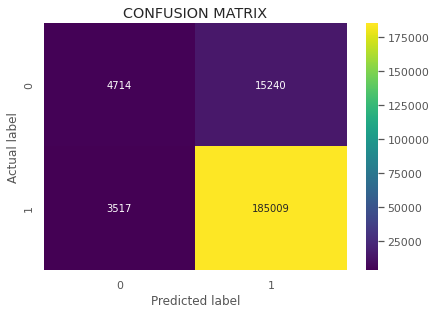

M Y   M O D E L    S C O R E 0.9083095105619616


In [9]:
''' X and y are the inputs and labels of the dataframe respectively.
We will use X_train and Y_train for training the model
X_train has 65 columns/features with 2,08,480 different rows/examples
0 - No destruction
1 - Destruction '''

model_real = LogisticRegression()
model_real.fit(X_train, y_train)
score = model_real.score(X_test, y_test)
print("*****************R E A L   A C C U R A C Y   S C O R E*******", score)
print("                        ")

class LogisticRegressionRAY:
    def __init__(self, learning_rate=0.01, epochs=1000, verbose=False):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.verbose = verbose
      self.w = None
      self.b = None
      self.cost_per_iteration = []

    def sigmoid(self, z):
      return 1/(1+np.exp(-z))

    def loss(self, a, Y, m):
      return (-1/m)*np.sum(Y*np.log(a) + (1-Y)*np.log(1-a))
   
    def fit(self, X, Y):
      m, n = X.shape
      #Forward propagatoin
      self.w = np.zeros(n)
      self.b = 0

      for i in range(self.epochs):
        z = np.dot(X, self.w) + self.b
        a = self.sigmoid(z)
        cost = self.loss(a, Y, m)

        if i%500 ==0 and self.verbose==True:
          self.cost_per_iteration.append(cost)
          print("Number of Epochs: ",i," Cost: ",cost)
        
        #Backpropagation
        dw = (np.dot(X.T, (a - Y)))/m #gradient of weight
        db = (np.sum(a - Y)).mean()/m #gradient of bias
        
        #Updating weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, X):
        Z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(Z)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_hat]
        return y_predicted_cls

    
    def score(self, X, Y):
      z = np.dot(X, self.w) + self.b
      y_hat = self.sigmoid(z)
      return (y_hat.round()==Y).mean()
    
model = LogisticRegressionRAY(learning_rate=0.01, epochs=5000, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
score = model.score(X_test, y_test)

confuse = confusion_matrix(y_train, y_pred)    
sns.heatmap(pd.DataFrame(confuse), annot=True, cmap='viridis', fmt='g')
plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CONFUSION MATRIX')
plt.show()

print("M Y   M O D E L    S C O R E", score)
